In [4]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import nltk
import numpy as np
import string
from nltk.tokenize import word_tokenize
from collections import Counter 
import re
import scipy.stats as ss
import matplotlib.pyplot as plt
import math
from nltk.corpus import stopwords
from sklearn.manifold import MDS

#A

In [5]:
df = pd.read_csv('HW1_result.csv')
df = df.drop(columns =["Unnamed: 0"] )
df2 = pd.read_csv('car models and brands.csv')

In [6]:
df2.head()

,Brand,Model
0,acura,integra
1,acura,legend
2,acura,vigor
3,acura,rlx
4,acura,ilx


In [7]:
df.head()

,Date,user_id,comments
0,"March 24, 2002 10:54PM",merc1,I personally think that with a few tweaks the ...
1,"March 25, 2002 12:06AM",fredvh,I am debating a new purchase and these two are...
2,"March 25, 2002 10:02AM",blueguydotcom,"Great handling, RWD, excellent engine and the ..."
3,"March 25, 2002 4:04PM",hungrywhale,And no manual tranny. That may not matter to y...
4,"March 25, 2002 5:44PM",riez,One beauty of BMW 3 Series is that there are s...


In [8]:
car_dic = dict(zip(df2["Model"], df2["Brand"]))
car_dic

{'integra': 'acura',
 'legend': 'honda',
 'vigor': 'acura',
 'rlx': 'acura',
 'ilx': 'acura',
 'mdx': 'acura',
 'rdx': 'acura',
 'tsx': 'acura',
 'rsx': 'acura',
 'quattro': 'audi',
 'a4': 'audi',
 'a6': 'audi',
 'a5': 'audi',
 'a7': 'audi',
 'q3': 'audi',
 'q5': 'audi',
 'q7': 'audi',
 'a8': 'audi',
 'a3': 'audi',
 '3-series': 'bmw',
 '5-series': 'bmw',
 '6-series': 'bmw',
 '4-series': 'bmw',
 'xdrive': 'bmw',
 'alpina': 'bmw',
 '330ci': 'bmw',
 '328i': 'bmw',
 '330c': 'bmw',
 '335i': 'bmw',
 '335d': 'bmw',
 '528i': 'bmw',
 '535i': 'bmw',
 '128i': 'bmw',
 '640i': 'bmw',
 '3er': 'bmw',
 '5er': 'bmw',
 'm5': 'bmw',
 'm3': 'bmw',
 'm6': 'bmw',
 'bmws': 'bmw',
 'bmwesque': 'bmw',
 'park avenue': 'buick',
 'la crosse': 'buick',
 'lacrosse': 'buick',
 'century': 'toyota',
 'enclave': 'buick',
 'encore': 'buick',
 'regal': 'buick',
 'buicks': 'buick',
 'escalade': 'cadillac',
 'srx': 'cadillac',
 'xts': 'cadillac',
 'cars': 'car',
 'grand blazer': 'chevrolet',
 'trailblazer': 'chevrolet',
 '

In [9]:
words_list = []
trans=str.maketrans({key: None for key in string.punctuation})
for i in df["comments"]:
    word = word_tokenize(str(i).lower())#.translate(trans))
    words_list.extend(word)

In [10]:
#counts = [(w, words_list.count(w)) for w in set(words_list)]

In [11]:
fd = nltk.FreqDist(words_list)

In [12]:
words_df = pd.DataFrame.from_records([dict(fd)]).T.reset_index()
words_df.columns = ["words", "counts"]
sorted_counts_rank = ss.rankdata([-1*c for c in words_df["counts"]]).astype(int)
words_df["rank"] = sorted_counts_rank

In [13]:
words_df = words_df.sort_values(by = "counts", ascending = False).reset_index()[:100]
words_df

,index,words,counts,rank
0,8,the,26770,1
1,18,.,24921,2
2,66,",",19460,3
3,0,i,12511,4
4,5,a,12078,5
...,...,...,...,...
95,359,know,744,96
96,438,driving,739,97
97,247,very,738,98
98,84,best,734,99


In [14]:
# sorted_counts = sorted(counts, key = lambda x:x[1], reverse=True)
# sorted_counts_rank = ss.rankdata([-1*c for (w,c) in sorted_counts]).astype(int)
# words_rank = np.column_stack((sorted_counts, sorted_counts_rank))[:100]
# words_df = pd.DataFrame(words_rank, columns = ["words","counts","rank"])
# words_df

In [15]:
words_df["logcount"] = words_df["counts"].astype(int).map(lambda x : math.log(x))
words_df["logrank"] = words_df["rank"].astype(int).map(lambda x : math.log(x))
words_df["zipfcount"] = words_df["rank"].astype(int).map(lambda x : math.log(float(words_df["counts"][0])/x))

In [16]:
words_df

,index,words,counts,rank,logcount,logrank,zipfcount
0,8,the,26770,1,10.195037,0.000000,10.195037
1,18,.,24921,2,10.123466,0.693147,9.501890
2,66,",",19460,3,9.876116,1.098612,9.096425
3,0,i,12511,4,9.434364,1.386294,8.808743
4,5,a,12078,5,9.399141,1.609438,8.585599
...,...,...,...,...,...,...,...
95,359,know,744,96,6.612041,4.564348,5.630689
96,438,driving,739,97,6.605298,4.574711,5.620326
97,247,very,738,98,6.603944,4.584967,5.610070
98,84,best,734,99,6.598509,4.595120,5.599917


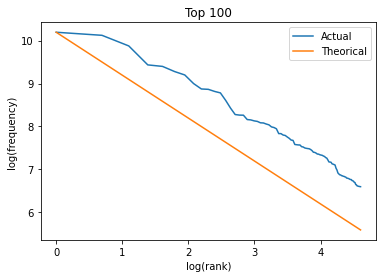

In [17]:
#words_df[["logrank","logcount"]].astype(float).plot(x = "logrank")
plt.plot(words_df["logrank"],words_df["logcount"], label = "Actual")
plt.plot(words_df["logrank"],words_df["zipfcount"],label = "Theorical")
plt.xlabel("log(rank)")
plt.ylabel("log(frequency)")
plt.title('Top 100')
plt.legend()
plt.show()

#B

In [18]:
stop = stopwords.words('english')

In [19]:
#words_list_nostop = []
#for i in words_list:
    #if i not in stop:
        #words_list_nostop.append(i)

In [20]:
def model_to_brand(x):
    text = str(x)
    for i,j in car_dic.items():
        pattern = re.compile(i,re.IGNORECASE)
        text = pattern.sub(j,text)
    return text

In [21]:
df["comments"] = df["comments"].astype(str)
df["comments"] = df["comments"].apply(model_to_brand)
df["comments_tokens"] = df["comments"].apply(lambda x: word_tokenize(x.lower()))#.translate(trans)))
#df["comments_tokens"] = df["comments_tokens"].apply(lambda words_list: [car_dic[x] if x in car_dic else x for x in words_list])
df["comments_tokens"] = df["comments_tokens"].apply(lambda words_list: [x for x in words_list if x not in stop])

In [22]:
df

,Date,user_id,comments,comments_tokens
0,"March 24, 2002 10:54PM",merc1,I personally think that with a few tweaks the ...,"[personally, think, tweaks, c320, could, also,..."
1,"March 25, 2002 12:06AM",fredvh,I am debating a new purchase and these two are...,"[debating, new, purchase, two, top, ltoyota, ...."
2,"March 25, 2002 10:02AM",blueguydotcom,"Great handling, RWD, hyundai.ent engine and th...","[great, handling, ,, rwd, ,, hyundai.ent, engi..."
3,"March 25, 2002 4:04PM",hungrywhale,And no manual tranny. That may not matter to y...,"[manual, tranny, ., may, matter, ,, certainly,..."
4,"March 25, 2002 5:44PM",riez,One beauty of BMW 3 Series is that there are s...,"[one, beauty, bmw, 3, series, many, models, ch..."
...,...,...,...,...
4995,"January 23, 2006 9:51PM",nyccarguy,I agree with blueguydotcom. The IS350 is one f...,"[agree, blueguydotcom, ., is350, one, fast, ri..."
4996,"January 23, 2006 11:29PM",blueguydotcom,Don't have any interest in aftermarket tuners....,"[n't, interest, aftermarket, tuners, ., 3.5, 3..."
4997,"January 24, 2006 7:39PM",vchiu,>Don't have any interest in aftermarket tuners...,"[>, n't, interest, aftermarket, tuners, consid..."
4998,"January 24, 2006 7:42PM",blueguydotcom,AMG i have no use for...it's MB afterall. As f...,"[amg, use, ..., 's, mb, afterall, ., ,, 's, ac..."


In [23]:
all_words = df["comments_tokens"].sum()

In [24]:
all_words

['personally',
 'think',
 'tweaks',
 'c320',
 'could',
 'also',
 'sit',
 'top',
 'group',
 '.',
 "'s",
 'still',
 'entry-level',
 'luxury',
 'sedan',
 'mercedes-benz',
 'would',
 'lead',
 'believe',
 '.',
 'c320',
 '``',
 'sport',
 "''",
 'needs',
 "'s",
 'suspension',
 'retuned',
 'accept',
 '17',
 'inch',
 'tires',
 'without',
 'harsh',
 'ride',
 '.',
 'mb',
 'also',
 'needs',
 'stop',
 'forcing',
 'metal',
 'trim',
 'black',
 'leather',
 'everyone',
 'wants',
 'sport',
 'package',
 '.',
 'c240',
 "'s",
 '6-speed',
 'would',
 "n't",
 'hurt',
 'either',
 'offered',
 'c320',
 ',',
 'though',
 'needs',
 '``',
 'fixed',
 "''",
 'first',
 '.',
 'toyotad',
 ',',
 'favorite',
 'group',
 '(',
 'gasp',
 '!',
 ')',
 'new',
 'audi',
 '3.0.',
 'audi',
 'easily',
 'best',
 'interior',
 'sub-40k',
 'car',
 ',',
 'combine',
 'stunning',
 'looks',
 'body',
 'rigid',
 'ever',
 'made',
 'personal',
 'favorite',
 '.',
 'single',
 'thing',
 "n't",
 'like',
 'audi',
 'grey',
 'trim',
 'around',
 'bottom'

In [25]:
word_frequencies = Counter(w for w in all_words)

In [26]:
word_frequencies

Counter({'personally': 98,
         'think': 1215,
         'tweaks': 6,
         'c320': 37,
         'could': 597,
         'also': 729,
         'sit': 39,
         'top': 265,
         'group': 53,
         '.': 24925,
         "'s": 3876,
         'still': 631,
         'entry-level': 66,
         'luxury': 702,
         'sedan': 947,
         'mercedes-benz': 356,
         'would': 1604,
         'lead': 23,
         'believe': 310,
         '``': 2441,
         'sport': 400,
         "''": 2524,
         'needs': 124,
         'suspension': 163,
         'retuned': 1,
         'accept': 33,
         '17': 35,
         'inch': 48,
         'tires': 449,
         'without': 270,
         'harsh': 19,
         'ride': 243,
         'mb': 299,
         'stop': 106,
         'forcing': 7,
         'metal': 12,
         'trim': 47,
         'black': 44,
         'leather': 131,
         'everyone': 160,
         'wants': 60,
         'package': 305,
         'c240': 16,
         '6-sp

In [27]:
brand = {}
for i in df2["Brand"].unique():
    brand[i] = word_frequencies[i]
brand

{'acura': 914,
 'audi': 878,
 'bmw': 2821,
 'buick': 32,
 'cadillac': 127,
 'car': 5887,
 'chevrolet': 132,
 'chrysler': 67,
 'dodge': 69,
 'ford': 206,
 'honda': 684,
 'hyndai kia': 0,
 'hyundai': 195,
 'hyundai,': 0,
 'hyundai.': 0,
 'infiniti': 574,
 'kia': 26,
 'kia,': 0,
 'kia.': 0,
 'lincoln': 81,
 'mazda': 90,
 'mercedes': 0,
 'mercedes benz': 0,
 'mercedes-benz': 356,
 'mercury': 9,
 'mitsubishi': 25,
 'nissan': 509,
 'nissan.': 0,
 'pontiac': 77,
 'problem': 377,
 'saturn': 12,
 'seat': 409,
 'sedan': 947,
 'subaru': 379,
 'suzuki': 21,
 'toyata': 0,
 'toyota': 446,
 'volkswagen': 323,
 'volkwagen': 0,
 'volvo': 220}

In [28]:
df_brand = pd.DataFrame([brand]).T
df_brand = df_brand.reset_index()
df_brand.columns =['Brand','Frequency']
df_brand = df_brand[df_brand["Frequency"] != 0]
df_brand2 = df_brand[df_brand['Brand'] != 'car'][df_brand['Brand'] != 'seat']\
[df_brand['Brand'] != 'sedan'][df_brand['Brand'] != 'problem']
top_10 = df_brand2.sort_values(by=['Frequency'],ascending = False)[:10]
top_10

,Brand,Frequency
2,bmw,2821
0,acura,914
1,audi,878
10,honda,684
15,infiniti,574
26,nissan,509
36,toyota,446
33,subaru,379
23,mercedes-benz,356
37,volkswagen,323


#C

In [29]:
df["comments_unique"] = df["comments_tokens"].apply(lambda x: set(x))

In [30]:
df

,Date,user_id,comments,comments_tokens,comments_unique
0,"March 24, 2002 10:54PM",merc1,I personally think that with a few tweaks the ...,"[personally, think, tweaks, c320, could, also,...","{rigid, fwd, sold, half, seconds, personally, ..."
1,"March 25, 2002 12:06AM",fredvh,I am debating a new purchase and these two are...,"[debating, new, purchase, two, top, ltoyota, ....","{new, initial, owned, quality, know, debating,..."
2,"March 25, 2002 10:02AM",blueguydotcom,"Great handling, RWD, hyundai.ent engine and th...","[great, handling, ,, rwd, ,, hyundai.ent, engi...","{around, great, easy, handling, best, warranty..."
3,"March 25, 2002 4:04PM",hungrywhale,And no manual tranny. That may not matter to y...,"[manual, tranny, ., may, matter, ,, certainly,...","{tranny, board, winner, matter, ., manual, may..."
4,"March 25, 2002 5:44PM",riez,One beauty of BMW 3 Series is that there are s...,"[one, beauty, bmw, 3, series, many, models, ch...","{..., half, basic, wagon, beauty, choices, alm..."
...,...,...,...,...,...
4995,"January 23, 2006 9:51PM",nyccarguy,I agree with blueguydotcom. The IS350 is one f...,"[agree, blueguydotcom, ., is350, one, fast, ri...","{ride, ..., is350, last, driving, ., horsepowe..."
4996,"January 23, 2006 11:29PM",blueguydotcom,Don't have any interest in aftermarket tuners....,"[n't, interest, aftermarket, tuners, ., 3.5, 3...","{n't, tuners, 3.0tt, bmw, aftermarket, suppose..."
4997,"January 24, 2006 7:39PM",vchiu,>Don't have any interest in aftermarket tuners...,"[>, n't, interest, aftermarket, tuners, consid...","{tuners, 6-in, limitations, 340., 3,5l, shoeho..."
4998,"January 24, 2006 7:42PM",blueguydotcom,AMG i have no use for...it's MB afterall. As f...,"[amg, use, ..., 's, mb, afterall, ., ,, 's, ac...","{want, dinan, ..., afterall, like, division, u..."


In [31]:
def two_brand(brand1,brand2,input_text):
    c = 0
    for i in input_text:
        if brand1 in i and brand2 in i:
            c+=1
    return c

def one_brand(brand,input_text):
    u = 0
    for i in input_text:
        if brand in i:
            u+=1
    if u ==0:
        u = 1
    return u
def lift_calculation(b1,b2,post):
    lift = (len(post)*two_brand(b1,b2,post)/(one_brand(b1,post)*one_brand(b2,post)))
    return lift

In [32]:
# def calculate_lift(a, b, tokenized_posts):
#     num_a = 0
#     num_b = 0
#     num_a_b = 0
#     n = len(tokenized_posts)
#     if a==b:
#         return 1
#     for i in tokenized_posts:
#         if a in i:
#             num_a += 1
#         if b in i:
#             num_b += 1
#         if a in i and b in i:
#             num_a_b += 1
#     if num_a == 0:
#         return (float(n)*num_a_b)/(num_b)
#     elif num_b == 0:
#         return (float(n)*num_a_b)/(num_a)
#     else:
#         return (float(n)*num_a_b)/(num_a*num_b)

In [33]:
A = np.zeros((10,10))

for i in range (10):
    for j in range (i+1,10):
        b1 = top_10["Brand"].values[i]
        b2 = top_10["Brand"].values[j]
        #A[i,j]= calculate_lift(b1,b2,df.comments_unique)#(len(df)*two_brand(b1,b2)/(one_brand(b1)*one_brand(b2)))
        #A[i,j]= (len(df)*two_brand(b1,b2)/(one_brand(b1)*one_brand(b2)))
        A[i,j] = lift_calculation(b1,b2,df.comments_unique)

A

array([[0.        , 1.5031265 , 1.70019029, 1.25668068, 1.93210442,
        1.1914236 , 1.39390399, 1.18371212, 1.82312804, 1.5047188 ],
       [0.        , 0.        , 2.18378756, 2.57704976, 3.04310548,
        2.24049084, 1.73070267, 2.14159738, 2.08648274, 1.79356112],
       [0.        , 0.        , 0.        , 1.40001723, 2.67335203,
        1.53647594, 1.32251807, 1.68463612, 3.68514151, 4.66368191],
       [0.        , 0.        , 0.        , 0.        , 1.35146015,
        3.86714857, 3.80517504, 1.57642966, 1.4779028 , 2.06382375],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        2.46145768, 1.13781712, 1.85918196, 2.53013674, 2.13465397],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 3.70381645, 1.6286645 , 1.5995812 , 2.7604483 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.33511348, 2.01657766, 2.11204393],
       [0.        , 0.        , 0.       

In [34]:
lift_matrix = pd.DataFrame(A, columns = top_10["Brand"].values, index = top_10["Brand"].values)
lift_matrix[lift_matrix.eq(0)]= ""
lift_matrix

,bmw,acura,audi,honda,infiniti,nissan,toyota,subaru,mercedes-benz,volkswagen
bmw,,1.50313,1.70019,1.25668,1.9321,1.19142,1.3939,1.18371,1.82313,1.50472
acura,,,2.18379,2.57705,3.04311,2.24049,1.7307,2.1416,2.08648,1.79356
audi,,,,1.40002,2.67335,1.53648,1.32252,1.68464,3.68514,4.66368
honda,,,,,1.35146,3.86715,3.80518,1.57643,1.4779,2.06382
infiniti,,,,,,2.46146,1.13782,1.85918,2.53014,2.13465
nissan,,,,,,,3.70382,1.62866,1.59958,2.76045
toyota,,,,,,,,1.33511,2.01658,2.11204
subaru,,,,,,,,,1.27551,2.42131
mercedes-benz,,,,,,,,,,3.65718
volkswagen,,,,,,,,,,


#D

In [35]:
B = A.copy()

for i in range(10):
    for j in range (10):
        if B[i,j] != 0:
            B[i,j] = 1/(B[i,j])
B

array([[0.        , 0.66528   , 0.58816946, 0.7957471 , 0.51757037,
        0.83933204, 0.71740952, 0.8448    , 0.54850783, 0.664576  ],
       [0.        , 0.        , 0.45792   , 0.38804062, 0.32861168,
        0.44633077, 0.5778    , 0.46694118, 0.47927547, 0.55755   ],
       [0.        , 0.        , 0.        , 0.71427692, 0.37406222,
        0.65084   , 0.75613333, 0.5936    , 0.27136   , 0.21442286],
       [0.        , 0.        , 0.        , 0.        , 0.73994043,
        0.25858846, 0.2628    , 0.63434483, 0.67663448, 0.4845375 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.40626333, 0.87887586, 0.53787097, 0.39523556, 0.46846   ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.26999178, 0.614     , 0.62516364, 0.36226   ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.749     , 0.49588966, 0.473475  ],
       [0.        , 0.        , 0.       

In [36]:
# mds = MDS( random_state = 0)
# mds_model = mds.fit_transform(B)

# mds_model

In [37]:
# fig = plt.figure(1, (10,4))
# ax = fig.add_subplot(122)
# plt.scatter(mds_model[:,0], mds_model[:,1], s = 75, color = "red")
# plt.title('MDS', loc = "right")
# fig.subplots_adjust(wspace=.4, hspace=0.5)

# for i in range (10):
#     plt.annotate(top_10["Brand"].values[i],mds_model[i],xytext = (10, 10),
#                textcoords = 'offset points', 
#                ha = 'right', 
#                va = 'bottom', bbox = dict(boxstyle = 'round,pad=0.5', fc = 'green', alpha = 0.2),
#                arrowprops = dict(arrowstyle = 'simple', connectionstyle = 'arc3,rad=0'))
    
# plt.show()

In [38]:
w = np.maximum(B,B.transpose())
w 

array([[0.        , 0.66528   , 0.58816946, 0.7957471 , 0.51757037,
        0.83933204, 0.71740952, 0.8448    , 0.54850783, 0.664576  ],
       [0.66528   , 0.        , 0.45792   , 0.38804062, 0.32861168,
        0.44633077, 0.5778    , 0.46694118, 0.47927547, 0.55755   ],
       [0.58816946, 0.45792   , 0.        , 0.71427692, 0.37406222,
        0.65084   , 0.75613333, 0.5936    , 0.27136   , 0.21442286],
       [0.7957471 , 0.38804062, 0.71427692, 0.        , 0.73994043,
        0.25858846, 0.2628    , 0.63434483, 0.67663448, 0.4845375 ],
       [0.51757037, 0.32861168, 0.37406222, 0.73994043, 0.        ,
        0.40626333, 0.87887586, 0.53787097, 0.39523556, 0.46846   ],
       [0.83933204, 0.44633077, 0.65084   , 0.25858846, 0.40626333,
        0.        , 0.26999178, 0.614     , 0.62516364, 0.36226   ],
       [0.71740952, 0.5778    , 0.75613333, 0.2628    , 0.87887586,
        0.26999178, 0.        , 0.749     , 0.49588966, 0.473475  ],
       [0.8448    , 0.46694118, 0.5936   

In [39]:
pd.DataFrame(w, columns = top_10["Brand"].values, index = top_10["Brand"].values)

,bmw,acura,audi,honda,infiniti,nissan,toyota,subaru,mercedes-benz,volkswagen
bmw,0.000000,0.665280,0.588169,0.795747,0.517570,0.839332,0.717410,0.844800,0.548508,0.664576
acura,0.665280,0.000000,0.457920,0.388041,0.328612,0.446331,0.577800,0.466941,0.479275,0.557550
audi,0.588169,0.457920,0.000000,0.714277,0.374062,0.650840,0.756133,0.593600,0.271360,0.214423
honda,0.795747,0.388041,0.714277,0.000000,0.739940,0.258588,0.262800,0.634345,0.676634,0.484538
infiniti,0.517570,0.328612,0.374062,0.739940,0.000000,0.406263,0.878876,0.537871,0.395236,0.468460
nissan,0.839332,0.446331,0.650840,0.258588,0.406263,0.000000,0.269992,0.614000,0.625164,0.362260
toyota,0.717410,0.577800,0.756133,0.262800,0.878876,0.269992,0.000000,0.749000,0.495890,0.473475
subaru,0.844800,0.466941,0.593600,0.634345,0.537871,0.614000,0.749000,0.000000,0.784000,0.413000
mercedes-benz,0.548508,0.479275,0.271360,0.676634,0.395236,0.625164,0.495890,0.784000,0.000000,0.273434
volkswagen,0.664576,0.557550,0.214423,0.484538,0.468460,0.362260,0.473475,0.413000,0.273434,0.000000


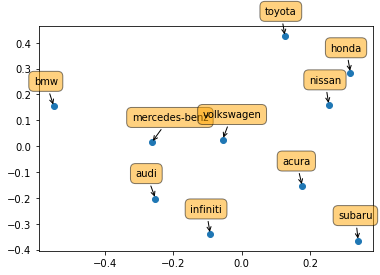

In [40]:
seed = np.random.RandomState(seed=3)
mds = MDS(n_components=2, max_iter=3000, eps=1e-9, 
      random_state=seed, dissimilarity="precomputed", n_jobs=1)
results = mds.fit(w)
coords = results.embedding_

plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = 'o'
    )
for label, x, y in zip(top_10["Brand"].values, coords[:, 0], coords[:, 1]):
    
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points',ha = 'left', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'orange', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()

In [41]:
# num_brands = 10

# ## print(top_brands)
# top_brands = top_10.head(num_brands)
# lift_brands = []
# for index, brand_a in top_brands.iterrows():
#     for index, brand_b in top_brands.iterrows():
#         lift_brands.append(calculate_lift(brand_a.Brand, brand_b.Brand, df.comments_unique))

In [42]:
# lift_brands_df = np.reshape(lift_brands,(num_brands,num_brands))
# lift_brands_df

In [43]:
# lift_brands = pd.DataFrame(data= lift_brands_df, columns = list(top_brands["Brand"]), index = list(top_brands["Brand"]) )
# lift_brands

In [44]:
# dissimilarity_matrix = 1/lift_brands
# np.fill_diagonal(dissimilarity_matrix.values, 0)
# dissimilarity_matrix

In [45]:
# seed = np.random.RandomState(seed=3)
# mds = MDS(n_components=2, max_iter=3000, eps=1e-9, 
#       random_state=seed, n_jobs=1)
# results = mds.fit(dissimilarity_matrix)
# coords = results.embedding_

# plt.subplots_adjust(bottom = 0.1)
# plt.scatter(
#     coords[:, 0], coords[:, 1], marker = 'o'
#     )
# for label, x, y in zip(lift_brands, coords[:, 0], coords[:, 1]):
    
#     plt.annotate(
#         label,
#         xy = (x, y), xytext = (-20, 20),
#         textcoords = 'offset points',ha = 'left', va = 'bottom',
#         bbox = dict(boxstyle = 'round,pad=0.5', fc = 'orange', alpha = 0.5),
#         arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

# plt.show()

#E

#F

In [46]:
all_word_df = pd.DataFrame.from_dict([dict(word_frequencies)]).T
all_word_df = all_word_df.reset_index()
all_word_df.columns = ["words", "frequencies"]
all_word_df.sort_values(by = "frequencies", ascending = False)[50:100]

,words,frequencies
11,still,631
118,engine,628
178,time,598
175,'ve,597
4,could,597
108,way,585
327,series,582
452,infiniti,574
475,make,567
115,fwd,564


In [47]:
all_word_df = all_word_df.set_index("words")
attribute_list = all_word_df.loc[["performance", "luxury", "price", "engine", "handling"]]
attribute_list

,frequencies
words,
performance,934
luxury,702
price,553
engine,628
handling,515


In [48]:
#over_20_brand =[]
#for i in df_brand2["Brand"].unique():
    #if one_brand(i) >20:
        #over_20_brand.append(i)
#over_20_brand

In [49]:
df

,Date,user_id,comments,comments_tokens,comments_unique
0,"March 24, 2002 10:54PM",merc1,I personally think that with a few tweaks the ...,"[personally, think, tweaks, c320, could, also,...","{rigid, fwd, sold, half, seconds, personally, ..."
1,"March 25, 2002 12:06AM",fredvh,I am debating a new purchase and these two are...,"[debating, new, purchase, two, top, ltoyota, ....","{new, initial, owned, quality, know, debating,..."
2,"March 25, 2002 10:02AM",blueguydotcom,"Great handling, RWD, hyundai.ent engine and th...","[great, handling, ,, rwd, ,, hyundai.ent, engi...","{around, great, easy, handling, best, warranty..."
3,"March 25, 2002 4:04PM",hungrywhale,And no manual tranny. That may not matter to y...,"[manual, tranny, ., may, matter, ,, certainly,...","{tranny, board, winner, matter, ., manual, may..."
4,"March 25, 2002 5:44PM",riez,One beauty of BMW 3 Series is that there are s...,"[one, beauty, bmw, 3, series, many, models, ch...","{..., half, basic, wagon, beauty, choices, alm..."
...,...,...,...,...,...
4995,"January 23, 2006 9:51PM",nyccarguy,I agree with blueguydotcom. The IS350 is one f...,"[agree, blueguydotcom, ., is350, one, fast, ri...","{ride, ..., is350, last, driving, ., horsepowe..."
4996,"January 23, 2006 11:29PM",blueguydotcom,Don't have any interest in aftermarket tuners....,"[n't, interest, aftermarket, tuners, ., 3.5, 3...","{n't, tuners, 3.0tt, bmw, aftermarket, suppose..."
4997,"January 24, 2006 7:39PM",vchiu,>Don't have any interest in aftermarket tuners...,"[>, n't, interest, aftermarket, tuners, consid...","{tuners, 6-in, limitations, 340., 3,5l, shoeho..."
4998,"January 24, 2006 7:42PM",blueguydotcom,AMG i have no use for...it's MB afterall. As f...,"[amg, use, ..., 's, mb, afterall, ., ,, 's, ac...","{want, dinan, ..., afterall, like, division, u..."


In [50]:
C = np.zeros((len(df_brand2["Brand"].unique()),5))

for i in range(len(df_brand2["Brand"].unique())):#range (5):
    for j in range (5):
        brand = df_brand2["Brand"].unique()[i]#top_10["Brand"].values[i]
        attri = attribute_list.index[j]
        #C[i,j]= (len(df)*two_brand(brand,attri)/(one_brand(brand)*one_brand(attri)))
        C[i,j] = lift_calculation(brand,attri,df.comments_unique)
C

array([[1.4786042 , 1.99697883, 1.62768465, 1.68258023, 1.54947614],
       [1.49632332, 1.69219054, 2.17664433, 1.81630883, 1.46262981],
       [1.46444143, 1.32968559, 1.5349538 , 1.44494514, 1.64251527],
       [1.00704935, 2.61584454, 0.7788162 , 2.29885057, 1.72265289],
       [1.83718462, 2.22195289, 1.57868149, 1.44972559, 1.39674558],
       [1.59772252, 1.07795792, 1.01096334, 0.8841733 , 2.60882528],
       [1.43244088, 2.51275707, 1.81276184, 0.99088387, 1.33654103],
       [1.61847216, 0.40038437, 0.62583445, 2.25779967, 0.69213732],
       [1.86162291, 2.13162382, 1.56311702, 1.86174518, 1.81970375],
       [1.51747162, 1.7148883 , 1.89369692, 1.46958484, 1.56336649],
       [1.18598787, 2.96482971, 1.44821194, 0.7599506 , 1.28131206],
       [1.61711324, 1.75079916, 1.64787307, 1.50554446, 1.26920899],
       [1.31354262, 3.41197114, 2.03169443, 0.49975012, 1.12346927],
       [2.3602719 , 3.32819507, 1.82535047, 0.89798851, 1.00936693],
       [2.14338205, 1.66646467, 1.

In [51]:
brand_attri_list = pd.DataFrame(C, columns =list(attribute_list.index), index = df_brand2["Brand"].unique())
brand_attri_list

,performance,luxury,price,engine,handling
acura,1.478604,1.996979,1.627685,1.682580,1.549476
audi,1.496323,1.692191,2.176644,1.816309,1.462630
bmw,1.464441,1.329686,1.534954,1.444945,1.642515
buick,1.007049,2.615845,0.778816,2.298851,1.722653
cadillac,1.837185,2.221953,1.578681,1.449726,1.396746
chevrolet,1.597723,1.077958,1.010963,0.884173,2.608825
chrysler,1.432441,2.512757,1.812762,0.990884,1.336541
dodge,1.618472,0.400384,0.625834,2.257800,0.692137
ford,1.861623,2.131624,1.563117,1.861745,1.819704
honda,1.517472,1.714888,1.893697,1.469585,1.563366


In [52]:
brand_attri_list.loc[[brand_attri_list["performance"].idxmax(),brand_attri_list["luxury"].idxmax(),\
                      brand_attri_list["price"].idxmax(),brand_attri_list["engine"].idxmax(),\
                      brand_attri_list["handling"].idxmax()]]

,performance,luxury,price,engine,handling
lincoln,2.360272,3.328195,1.825350,0.897989,1.009367
kia,1.313543,3.411971,2.031694,0.499750,1.123469
suzuki,0.397519,0.590040,2.459420,0.604961,1.359989
buick,1.007049,2.615845,0.778816,2.298851,1.722653
chevrolet,1.597723,1.077958,1.010963,0.884173,2.608825


#H

In [53]:
aspiration_list = ['want','hope','wants','buy','prefer']
aspiration_dict = {'want':"aspiration",'hope':"aspiration",'wants':"aspiration",'buy':"aspiration",'prefer':"aspiration"}
df["comments_aspiration"] = df["comments_unique"].apply(lambda unique_list:\
                                                        [aspiration_dict[x] if x in aspiration_list \
                                                         else x for x in unique_list])

In [54]:
lift_asp_brands = pd.DataFrame(columns=['Brand','Lift'])
lift_asp_brands["Brand"] = df_brand2["Brand"].unique()

for i in range(len(lift_asp_brands)):
    lift_asp_brands["Lift"][i] = lift_calculation(lift_asp_brands["Brand"][i],"aspiration", df["comments_aspiration"])

lift_asp_brands.sort_values(by="Lift", ascending = False)

,Brand,Lift
17,mitsubishi,2.1707
3,buick,2.0694
12,kia,1.86869
8,ford,1.68153
23,toyota,1.68111
14,mazda,1.6779
24,volkswagen,1.56487
6,chrysler,1.5644
9,honda,1.55914
7,dodge,1.535
